In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('pred_data.csv')
data.shape

(10100, 2)

In [4]:
data.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [22]:
data['y'].value_counts()

0.0    10000
1.0      100
Name: y, dtype: int64

In [6]:
data['y_pred'] = data['proba'].apply(lambda x: 0.0 if x<0.5 else 1.0 ) 

In [7]:
data.head()

,y,proba,y_pred
0,0.0,0.281035,0.0
1,0.0,0.465152,0.0
2,0.0,0.352793,0.0
3,0.0,0.157818,0.0
4,0.0,0.276648,0.0


In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [11]:
cm = confusion_matrix(data['y'], data['y_pred'])
cm # 2d array

array([[9761,  239],
       [  45,   55]])

In [ ]:
# sns.heatmap(cm)

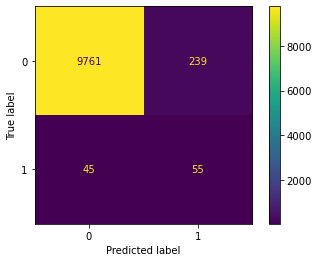

In [15]:
ConfusionMatrixDisplay(cm).plot();

In [21]:
# Accuracy
np.diag(cm).sum()/cm.sum()

0.9718811881188119

## Precision

In [23]:
55/(55+239)

0.1870748299319728

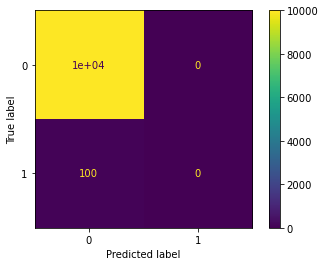

In [28]:
y_pred_dumb = np.zeros(len(data['y']))
cm_dumb = confusion_matrix(data['y'], y_pred_dumb)
ConfusionMatrixDisplay(cm_dumb).plot();

In [29]:
0/(0+0 + 1e-5)

0.0

In [30]:
from sklearn.metrics import precision_score

In [31]:
precision_score(data['y'], data['y_pred'])

0.1870748299319728

## Recall

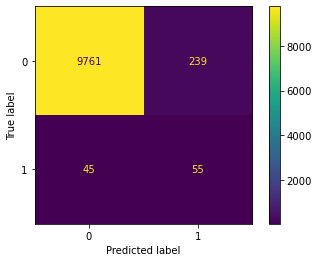

In [32]:
ConfusionMatrixDisplay(cm).plot();

In [33]:
55/(55+45)

0.55

In [34]:
from sklearn.metrics import recall_score

In [35]:
recall_score(data['y'], data['y_pred'])

0.55

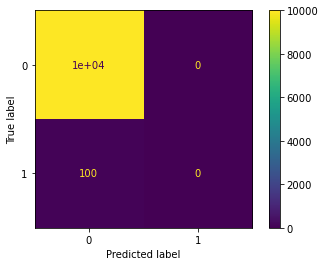

In [36]:
ConfusionMatrixDisplay(cm_dumb).plot();

In [37]:
2*0.7*0.7/ (1.4)

0.7

In [38]:
2*0.9*0.5/(1.4)

0.6428571428571429

## F1 Score

In [40]:
re = recall_score(data['y'], data['y_pred'])
pr = precision_score(data['y'], data['y_pred'])

print(pr, re)
f1 = 2*pr*re/ (pr+re)
print(f1.round(2))

0.1870748299319728 0.55
0.28


In [41]:
from sklearn.metrics import f1_score

In [43]:
f1_score(data['y'], data['y_pred']).round(2)

0.28

# ROC

In [57]:
np.random.randint(0, 2, 100)

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score

In [63]:
fpr, tpr, thres = roc_curve(data['y'], data['proba'])

Text(0.5, 1.0, 'ROC curve')

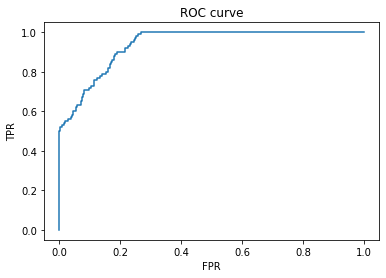

In [70]:
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr, tpr)
plt.title("ROC curve")

In [71]:
roc_auc_score(data['y'], data['proba'])

0.9377570000000001

In [72]:
from sklearn.metrics import precision_recall_curve, auc

In [73]:
precision, recall, thres = precision_recall_curve(data['y'], data['proba'])

Text(0.5, 1.0, 'PR curve')

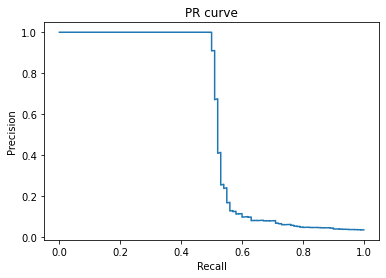

In [74]:
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot(recall, precision)
plt.title("PR curve")

In [76]:
auc(recall, precision)

0.5547651464107343